In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [5]:

df=pd.read_csv("C:\\Users\\ashish\\Downloads\\sample_employee_data.csv")
display(df.head(4))

,ID,Name,Age,Department,Salary,Joining_Date,Experience_Years,Performance_Rating,Remote_Work,Bonus
0,1,Person_1,56,Marketing,97969,2018-01-01,12,4,No,11331
1,2,Person_2,46,HR,35311,2018-06-30,14,2,No,13571
2,3,Person_3,32,Finance,83707,2018-12-27,2,2,Yes,13684
3,4,Person_4,25,Finance,58693,2019-06-25,10,4,Yes,12208


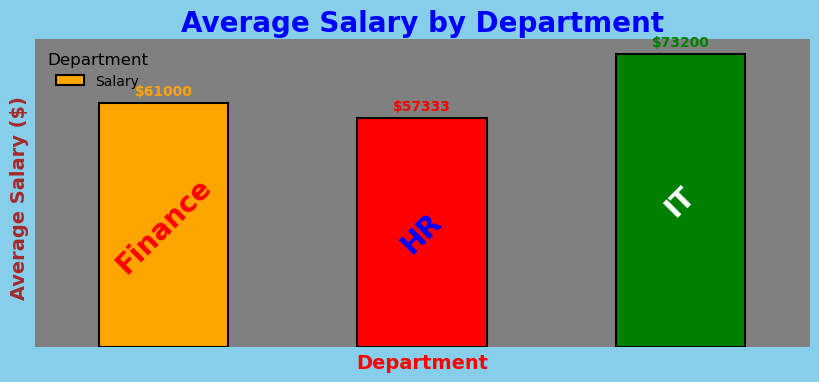

In [3]:
avg_salary = df.groupby('Department') ['Salary'].mean()
plt.figure(figsize=(10,4))

plt.gca().set_facecolor('gray')    # Light plot background
plt.gcf().set_facecolor('skyblue')    # Light figure background

# 
avg_salary.plot(kind='bar', color=['orange', 'red', 'green'],edgecolor='black',       
    linewidth=1.5)

plt.title("Average Salary by Department", color='blue',fontsize=20, fontweight='bold')
plt.ylabel("Average Salary ($) " ,color='brown', fontsize=14,fontweight='bold')
plt.xlabel("Department" ,color='red', fontsize=14,fontweight='bold')
plt.xticks([])
plt.yticks([])

# Grid for Y-axis only
#plt.grid(axis='y', linestyle='--', alpha=0.7)

# You can add value labels on top of bars like this:
# Different colors for top value labels
value_label_colors = [ 'orange','red', 'green']

for i, (v, c) in enumerate(zip(avg_salary, value_label_colors)):
    plt.text(i, v + 2000, f"${v:.0f}", ha='center', fontweight='bold', color=c)
# You can remove borders (spines) if you want a cleaner style:
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# Different colors for inside department names
inside_label_colors = ['red', 'blue', 'white']

for i, (dept, c) in enumerate(zip(avg_salary.index, inside_label_colors)):
    height = avg_salary.iloc[i]
    plt.text(
        i,
        height / 2,
        dept,
        ha='center', va='center',
        fontsize=20, fontweight='bold',
        color=c,
        rotation=45
    )


plt.legend(
    title="Department",
    title_fontsize=12,
    fontsize=10,
    loc='upper left',  # position
    frameon=False       # remove legend box border
)


plt.show()

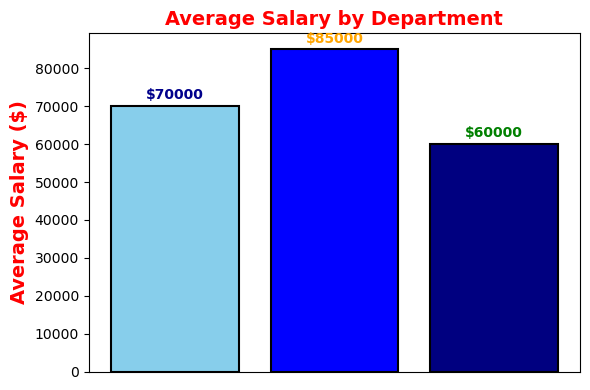

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (replace with your CSV reading)
# df = pd.read_csv("your_file.csv")
# avg_salary = df.groupby('Department')['Salary'].mean()

# For demonstration, here's a sample Series:
avg_salary = pd.Series([70000, 85000, 60000], index=['HR', 'IT', 'Finance'])

plt.figure(figsize=(6,4))
bars = plt.bar(avg_salary.index, avg_salary, color=['skyblue', 'blue', 'navy'], edgecolor='black', linewidth=1.5)

plt.title("Average Salary by Department", color='red', fontsize=14, fontweight='bold')
plt.ylabel("Average Salary ($)", color='red', fontsize=14, fontweight='bold')

# Remove x-axis labels
plt.xticks([])

# Define colors for labels
label_colors = ['darkblue', 'orange', 'green']  # same length as bars

for bar, color in zip(bars, label_colors):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X position (center of the bar)
        height + 1000,                      # Y position (a little above the bar)
        f"${height:.0f}",                  # Text label
        ha='center', va='bottom',          # Center align horizontally and place text above bar
        fontsize=10, fontweight='bold',
        color=color
    )

plt.tight_layout()
plt.show()


## Q Department wise employees -- Pie chart

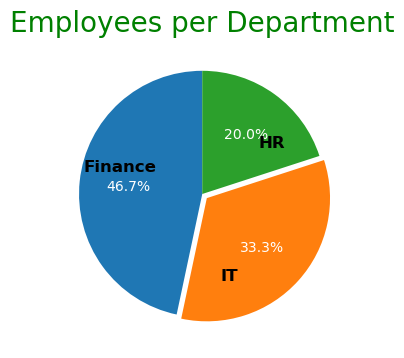

In [18]:
dept_counts = df['Department'].value_counts()
explode = (0, 0.05, 0) 
#explode = [0.1 if dept == 'HR' else 0 for dept in dept_counts.index]
color_map = {'HR': 'red', 'IT': 'blue', 'Finance': 'orange'}
colors = [color_map[dept] for dept in dept_counts.index]
# Create pie chart
plt.figure(figsize=(4, 4))
plt.pie(dept_counts, labels=dept_counts.index, autopct='%1.1f%%',textprops={'color': 'white'}, explode=explode,startangle=90, )
plt.title('Employees per Department',fontsize=20,color='green')

# Add department names inside slices.
for wedge, dept in zip(wedges, dept_counts.index):
    angle = (wedge.theta2 + wedge.theta1) / 2
    x = 0.7 * np.cos(np.deg2rad(angle))
    y = 0.7 * np.sin(np.deg2rad(angle))
    plt.text(x, y, dept, ha='center', va='center',
             fontsize=12, fontweight='bold')
plt.figure(figsize=(4, 4))
plt.pie(dept_counts, labels=dept_counts.index, autopct='%1.1f%%',textprops={'color': 'white'}, explode=explode,startangle=90, )
plt.title('Employees per Department',fontsize=20,color='green')



## Q Salary vs Bonus -- Scatter plot

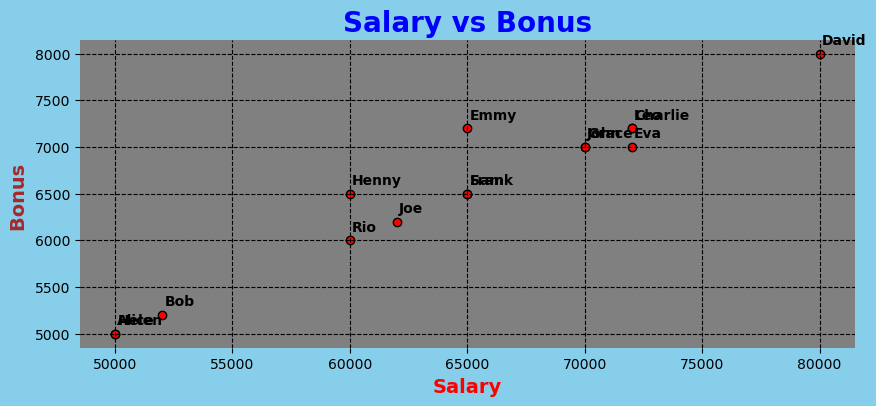

In [36]:
plt.figure(figsize=(10,4))

# plot background(inside)
plt.gca().set_facecolor('gray')    # Light plot background

# figure background (outside)
plt.gcf().set_facecolor('skyblue')    # Light figure background

 
plt.scatter(df['Salary'],df['Bonus'],edgecolor='black',  color='red', linewidth=1)

plt.title("Salary vs Bonus", color='blue',fontsize=20, fontweight='bold')
plt.ylabel("Bonus " ,color='brown', fontsize=14,fontweight='bold')
plt.xlabel("Salary" ,color='red', fontsize=14,fontweight='bold')

plt.grid(True, linestyle='--', alpha=1,color='black')


for i, dept in enumerate(df['Name']):
    plt.text(
        df['Salary'][i] +100, df['Bonus'][i] + 100, 
        dept,
        fontsize=10, fontweight='bold'
    )

# Remove borders lines
for spine in plt.gca().spines.values():
    spine.set_visible(False)


plt.show()

# Salary growth by joining data -- Line plot

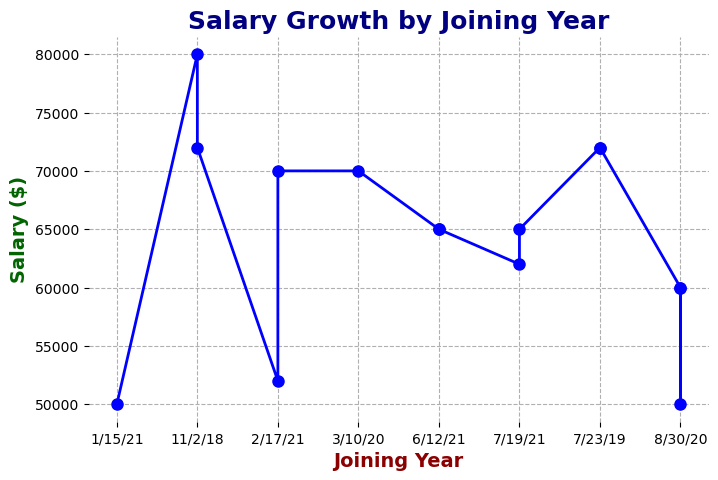

In [21]:
# Sort data by joining year just in case
df = df.sort_values('Joining_Date')

# Line plot
plt.figure(figsize=(8, 5))
plt.plot(
    df['Joining_Date'], df['Salary'],
    marker='o', markersize=8, linewidth=2, color='blue'
)

# Titles and labels
plt.title("Salary Growth by Joining Year", fontsize=18, fontweight='bold', color='navy')
plt.xlabel("Joining Year", fontsize=14, fontweight='bold', color='darkred')
plt.ylabel("Salary ($)", fontsize=14, fontweight='bold', color='darkgreen')

# Value labels on each point

# Grid
plt.grid(True, linestyle='--', alpha=1)

# Remove borders
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()


# Line Plot

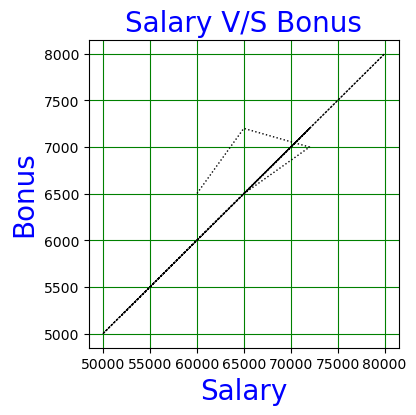

In [4]:
plt.figure(figsize=(4,4))
plt.plot(df['Salary'],df['Bonus'],linestyle=':',color='black',linewidth=1,alpha=1)

plt.title('Salary V/S Bonus',color='blue',fontsize=20)
plt.xlabel('Salary',color='blue',fontsize=20)
plt.ylabel('Bonus',color='blue',fontsize=20)
plt.grid(color='green')
plt.show()

# Scatter plot

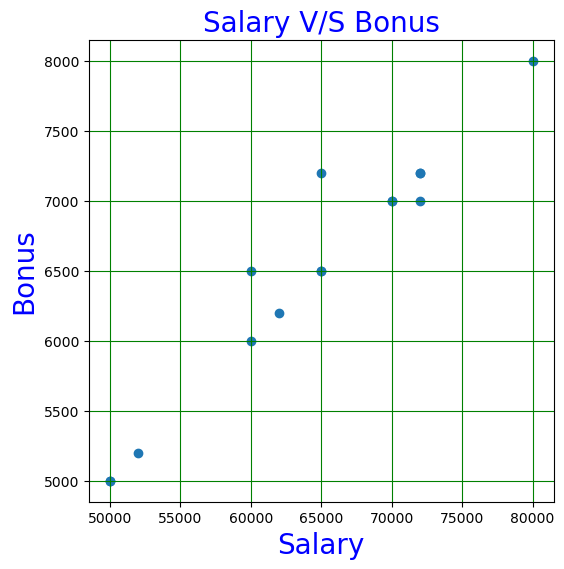

In [5]:
plt.figure(figsize=(6,6))
plt.scatter(df['Salary'],df['Bonus'])
plt.title('Salary V/S Bonus',color='blue',fontsize=20)
plt.xlabel('Salary',color='blue',fontsize=20)
plt.ylabel('Bonus',color='blue',fontsize=20)
plt.grid(color='green')
plt.show()

# Bar Plot

Text(0.5, 0, 'Name')

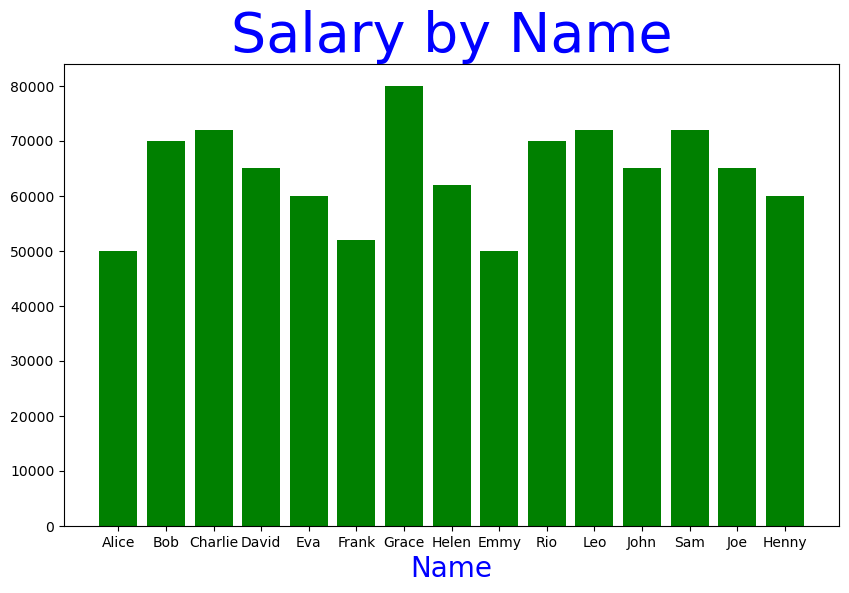

In [38]:
plt.figure(figsize=(10,6))
plt.bar(df['Name'],df['Salary'],color='green')

plt.title('Salary by Name',color='blue',fontsize=40)
plt.xlabel('Name',color='blue',fontsize=20)


Text(0, 0.5, 'Name')

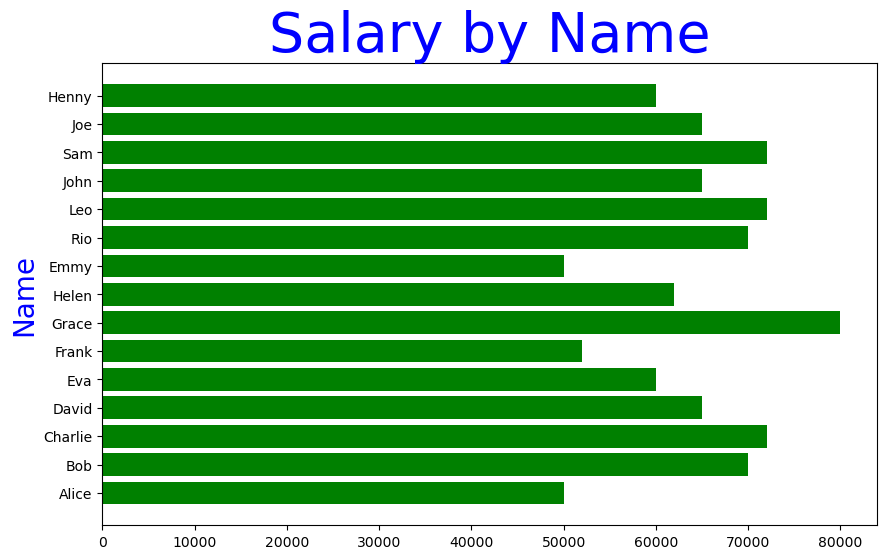

In [36]:
plt.figure(figsize=(10,6))
plt.barh(df['Name'],df['Salary'],color='green')

plt.title('Salary by Name',color='blue',fontsize=40)
plt.ylabel('Name',color='blue',fontsize=20)

# Pie chart

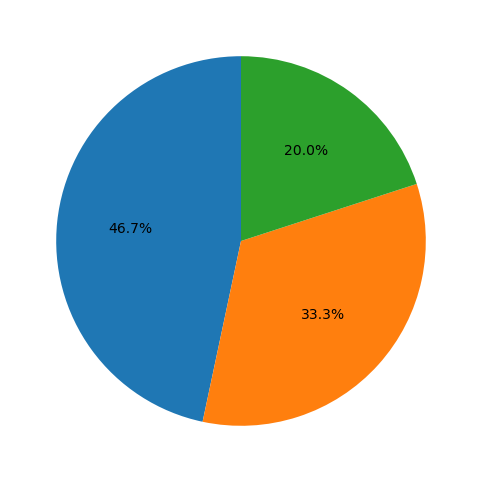

In [23]:
plt.figure(figsize=(6,6))
d2=df['Department'].value_counts()
plt.pie(d2,autopct='%1.1f%%',startangle=90,)
plt.show()

# Histogram

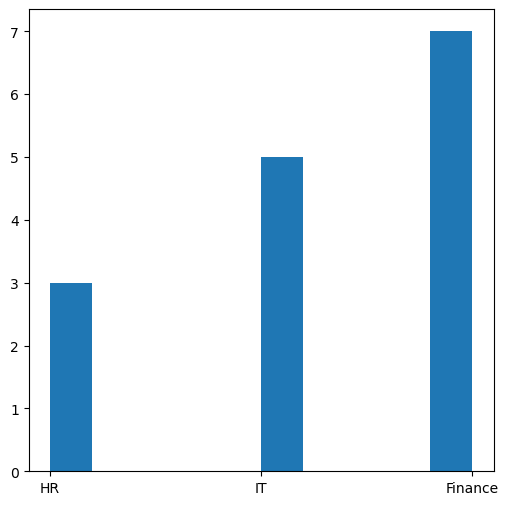

In [30]:
plt.figure(figsize=(6,6))
plt.hist(df['Department'], bins=10)
plt.show()

## Q create a line plot showing trend of salary against joining date

In [39]:
df1=pd.read_csv("C:\\Users\\ashish\\Downloads\\sample_employee_data.csv")
display(df1.head(5))

,ID,Name,Age,Department,Salary,Joining_Date,Experience_Years,Performance_Rating,Remote_Work,Bonus
0,1,Person_1,56,Marketing,97969,2018-01-01,12,4,No,11331
1,2,Person_2,46,HR,35311,2018-06-30,14,2,No,13571
2,3,Person_3,32,Finance,83707,2018-12-27,2,2,Yes,13684
3,4,Person_4,25,Finance,58693,2019-06-25,10,4,Yes,12208
4,5,Person_5,38,Marketing,55658,2019-12-22,9,5,No,10276


C:\Users\ashish\AppData\Local\Temp\ipykernel_12176\2549005072.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['d']=pd.to_datetime(df['Joining_Date'])


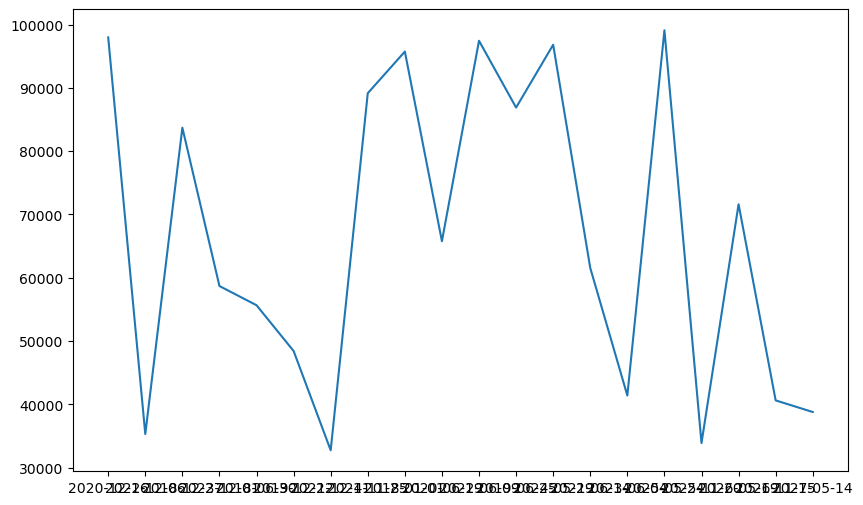

In [51]:
df1['d']=pd.to_datetime(df['Joining_Date'])
d=df1.sort_values('d')
plt.figure(figsize=(10,6))
plt.plot(d['Joining_Date'],df1['Salary'])

# Bar plot Question

In [ ]:
Bar Charts

Show the average salary by department.

Compare the total bonus given in each department.

Display the number of employees in each department.

Show the average performance rating for remote vs. non-remote employees.

# Display the number of employees in each department.

<BarContainer object of 5 artists>

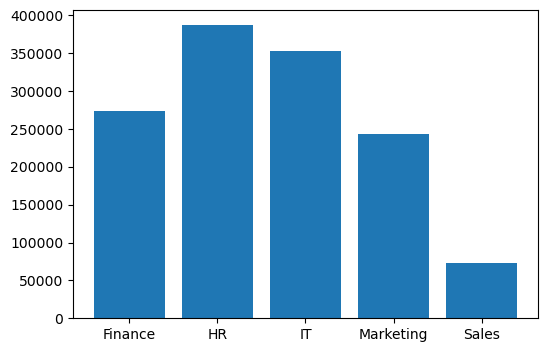

In [6]:
no=df.groupby('Department')['Salary'].sum()
plt.figure(figsize=(6,4))
plt.bar(no.index,no)

# Show the average performance rating for remote vs. non-remote employees.

<BarContainer object of 2 artists>

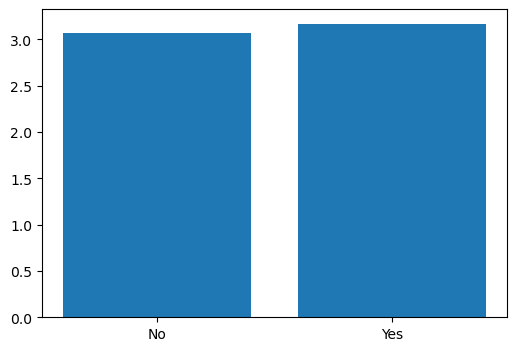

In [7]:
pr=df.groupby('Remote_Work')['Performance_Rating'].mean()
plt.figure(figsize=(6,4))
plt.bar(pr.index,pr)

# Compare the total bonus given in each department.

<BarContainer object of 5 artists>

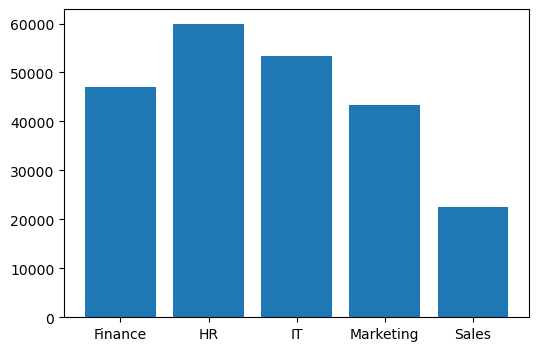

In [8]:
bo=df.groupby('Department')['Bonus'].sum()
plt.figure(figsize=(6,4))
plt.bar(bo.index,bo)

# Line plot Question

In [ ]:
Plot the trend of joining dates vs. salaries (chronological order).
6. Show the average salary over joining years.

# Plot the trend of joining dates vs. salaries (chronological order).

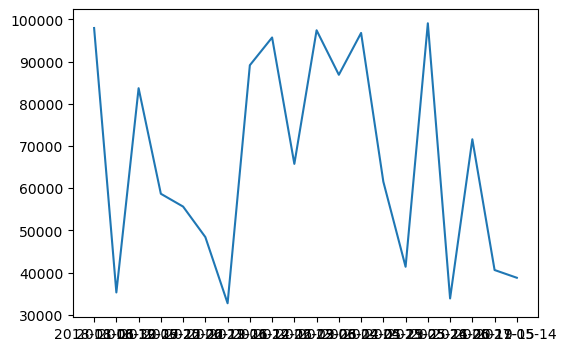

In [11]:
#df['date']=pd.to_datetime('Joining_Date')
#da=df.sort_vales('date')
plt.figure(figsize=(6,4))
plt.plot(df['Joining_Date'],df['Salary'])


# Scatter plot Question

In [ ]:
7. Scatter plot of salary vs. performance rating.
8. Scatter plot of salary vs. experience years, colored by department.

# 7. Scatter plot of salary vs. performance rating.

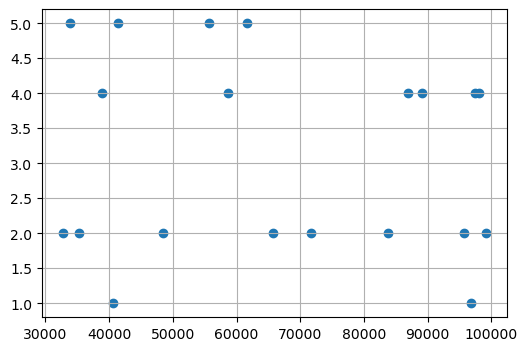

In [13]:
plt.figure(figsize=(6,4))
plt.scatter(df['Salary'],df['Performance_Rating'])
plt.grid()
plt.show()

# 8. Scatter plot of salary vs. experience years, colored by department.

C:\Users\ashish\AppData\Local\Temp\ipykernel_18392\1683707631.py:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


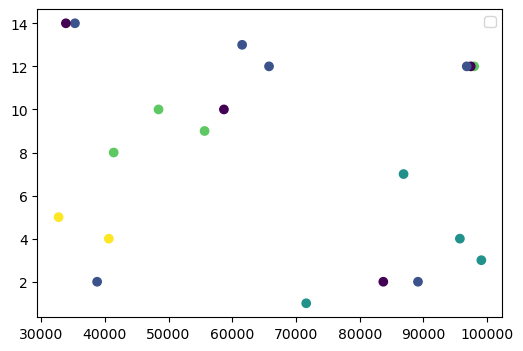

In [22]:
plt.figure(figsize=(6,4))
colors = df['Department'].astype('category').cat.codes
plt.scatter(df['Salary'],df['Experience_Years'], c=colors,)
plt.legend()


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

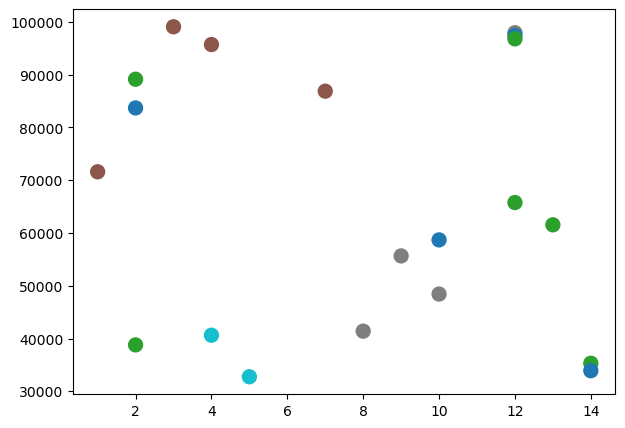

In [20]:
import matplotlib.pyplot as plt

# Map each department to a numeric code for coloring
colors = df['Department'].astype('category').cat.codes

plt.figure(figsize=(7,5))
scatter = plt.scatter(
    df['Experience_Years'], 
    df['Salary'], 
    c=colors, 
    cmap='tab10', 
    s=100
)

# Add legend with department names
plt.legend(handles=scatter.legend_elements()[0], 
           labels=df['Department'].unique(), 
           title="Department")

plt.xlabel("Experience (Years)")
plt.ylabel("Salary")
plt.title("Salary vs Experience by Department")
plt.show()


# 19 Aug

In [2]:
import numpy as np
# np.random.rand()

In [4]:
u=np.random.uniform(0,1,3)
print("uniform[0,1]:",u)

uniform[0,1]: [0.19644881 0.61865133 0.68996417]


In [6]:
n=np.random.normal(0,1,3)
print("Normal(a=0,b=1):",n)

Normal(a=0,b=1): [-0.00531621 -0.57398303 -0.50683602]


In [14]:
np.random.seed(10)
n=np.random.rand(2)
print("uniform[0,1]:",n)

uniform[0,1]: [0.77132064 0.02075195]


In [19]:
print(np.random.randint(5))


4


In [27]:
print(np.random.choice(np.arange(1,11),5))
print(np.random.choice(['H','T'],10,p=[0.7,0.3]))

[10  3  1  7  8]
['H' 'T' 'H' 'H' 'T' 'H' 'T' 'T' 'H' 'H']


In [23]:
arr=np.arange(10)
print(arr)
print(np.random.permutation(arr))
print(arr)

[0 1 2 3 4 5 6 7 8 9]
[0 7 5 2 3 9 6 4 8 1]
[0 1 2 3 4 5 6 7 8 9]


In [28]:
arr=np.arange(10)
print(arr)
np.random.shuffle(arr)
print(arr)


[0 1 2 3 4 5 6 7 8 9]
[1 3 9 4 8 7 5 0 2 6]


In [32]:
np.random.randint(0,2,5)

array([1, 0, 1, 1, 1])

C:\Users\ashish\AppData\Local\Temp\ipykernel_12176\2605595367.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=cl,palette="pastel")


<Axes: ylabel='count'>

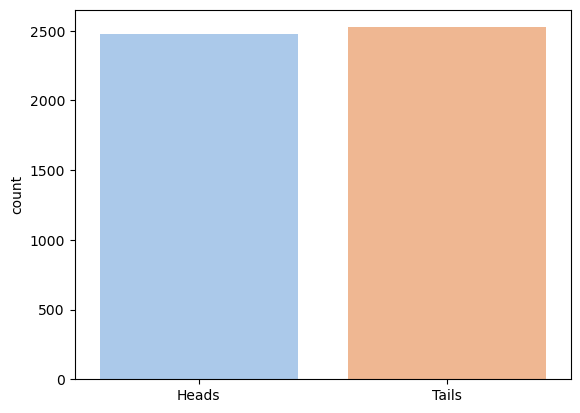

In [38]:
import seaborn as sns
ct=np.random.randint(0,2,5000)
cl=np.where(ct==0,"Heads","Tails")
sns.countplot(x=cl,palette="pastel")

# Q 

In [ ]:
np.random.rand(5)

In [7]:
n=5
p_head=0.5

t=np.random.rand(n)<p_head
print(t)
head=t.astype(int)
print(head)
prob_head=np.cumsum(head)/np.arange(1,n+1)
print(prob_head)
plt.figure(figsize=(12,6))
sns.lineplot(x=np.arange(1, n+1), y=prob_head, label="Estimated Probability of Heads")

# Add reference line at true probability
plt.axhline(p_head, color="red", linestyle="--", label="True Probability (0.5)")


[ True False False  True False]
[1 0 0 1 0]
[1.         0.5        0.33333333 0.5        0.4       ]


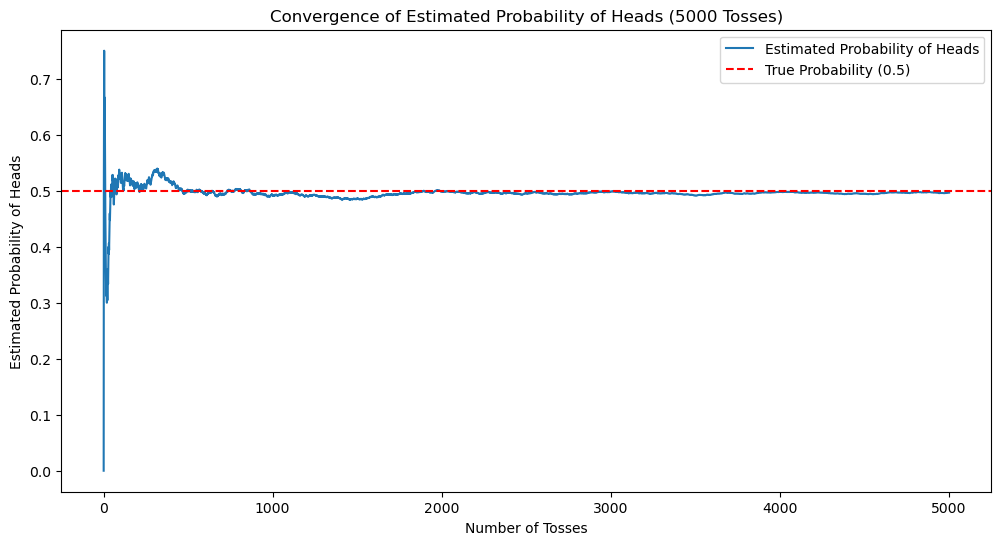

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Parameters
n = 5000
p_head = 0.5

# Simulate tosses
t = np.random.rand(n) < p_head
head = t.astype(int)

# Running probability of heads
prob_head = np.cumsum(head) / np.arange(1, n+1)

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(x=np.arange(1, n+1), y=prob_head, label="Estimated Probability of Heads")

# Add reference line at true probability
plt.axhline(p_head, color="red", linestyle="--", label="True Probability (0.5)")

plt.title("Convergence of Estimated Probability of Heads (5000 Tosses)")
plt.xlabel("Number of Tosses")
plt.ylabel("Estimated Probability of Heads")
plt.legend()
plt.show()


<Axes: ylabel='count'>

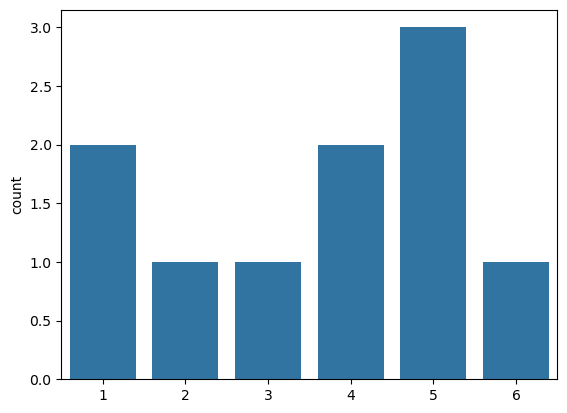

In [3]:
ct=np.random.randint(1,7,10)
#cl=np.where(ct==0,"Heads","Tails")
#sns.countplot(x=cl,palette="pastel")
sns.countplot(x=ct)

C:\Users\ashish\AppData\Local\Temp\ipykernel_15068\3939444656.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot( data=n,palette="pastel")


<Axes: ylabel='Count'>

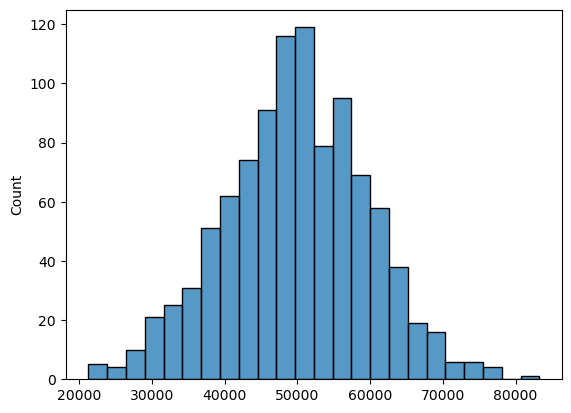

In [8]:
n=np.random.normal(50000,10000,1000)
np.clip(n,20000,100000)

sns.histplot( data=n,palette="pastel")

In [ ]:
it=np.random.normal(50000,10000,10)
hr=np.random.normal(50000,10000,10)
fin=np.random.normal(50000,10000,10)
sns.boxplot( data=n,palette="pastel")

  Department        Salary
0         IT  75209.525486
1         IT  59514.713489
2         IT  54332.745865
3         IT  47890.284859
4         IT  45574.882590
5         IT  47326.912456
6         IT  62137.013208
7         IT  64069.800186
8         IT  47350.474384
9         IT  67160.306513


<Axes: xlabel='Department', ylabel='Salary'>

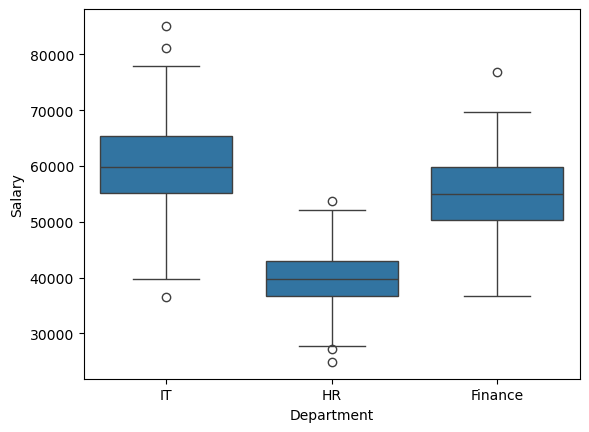

In [13]:
it_salaries = np.random.normal(60000, 8000, 200)    
hr_salaries = np.random.normal(40000, 5000, 200)   
finance_salaries = np.random.normal(55000, 7000, 200) 


salaries = np.concatenate([it_salaries, hr_salaries, finance_salaries])
#labels = (["IT"] * 200) + (["HR"] * 200) + (["Finance"] * 200)


dataset = pd.DataFrame({
    "Department": labels,
    "Salary": salaries
})

print(dataset.head(10))  


sns.boxplot(x="Department", y="Salary", data=dataset)


In [12]:
a1=np.array([[1,2,3],[4,5,6]])
a2=np.array([[1,2,3],[4,5,6]])
print(a1+a2)

[[ 2  4  6]
 [ 8 10 12]]


In [ ]:
# correlation matrix

In [ ]:
age = np.random.normal(20, 60, 200)    
exp = np.random.normal(0, 40, 200)   
salary = np.random.normal(55000, 7000, 200) 